# Quantum Measurement Tomography with Stochastic Gradient Descent (SGD-QMT)
This notebook provides basic tutorial on how to use SGD-QMT code to compute POVM operators for multi-qubit system. For demonstration purpose, we consider 2-qubit computational basis projectors as our target POVM set. However, the code is general and can be implemented to compute any type of POVM set. 

##### Make sure all the libraries imported in SGD_QMT.py are installed!

In [1]:
import sys
sys.path.insert(0, '..')
from SGD_QMT import *

## Example demonstration: 2-qubit system and target POVMs are computational basis projectors (measurement in Pauli-z basis) 

In [2]:
# Qubit system
n_qubits = 2
dimension = 2 ** n_qubits

# number of target POVM elements 
num_povms = 2**n_qubits


# Create random seed and PRNGKey to generate random intial guess
seed = int(time.time_ns() % (2**32))
key_true = jax.random.PRNGKey(seed)


# Target POVMs
true_povms = computational_basis_projectors(n_qubits)


# Input probe states
probe_states = get_default_probe_states(n_qubits)


# Target probabilities (This is your experimental data)
target_probs = simulate_measurements(true_povms, probe_states)


## Method 1: HONEST-MSE
Here we implement SGD-QMT using HONEST parametrization with MSE as a loss function. 

Seed value: 1977737568
Training system with 4 POVMs using 'mse' loss


Training:   0%|          | 0/300 [00:00<?, ?it/s]/Users/akshayga/anaconda3/lib/python3.11/site-packages/jax/_src/lax/lax.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  x_bar = _convert_element_type(x_bar, x.aval.dtype, x.aval.weak_type)
Step 299, Loss: 1.22086e-07: 100%|██████████| 300/300 [00:01<00:00, 293.50it/s]


Total training time: 1.04 seconds


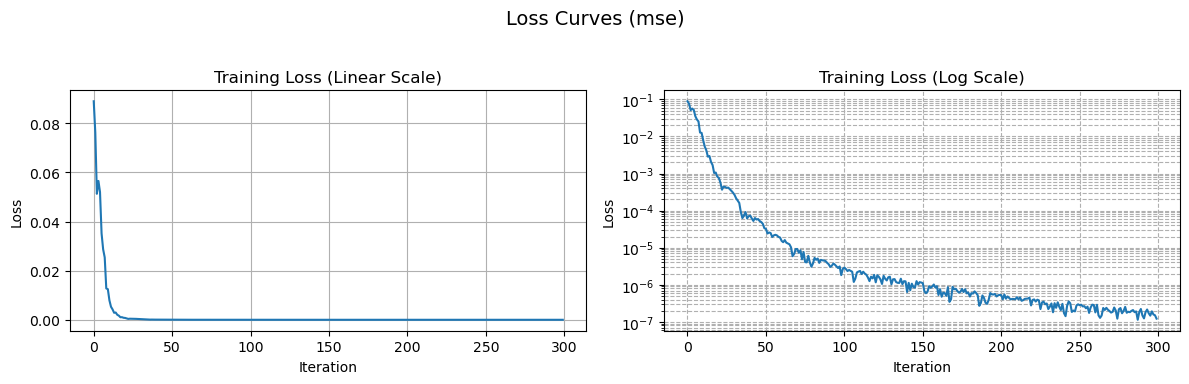

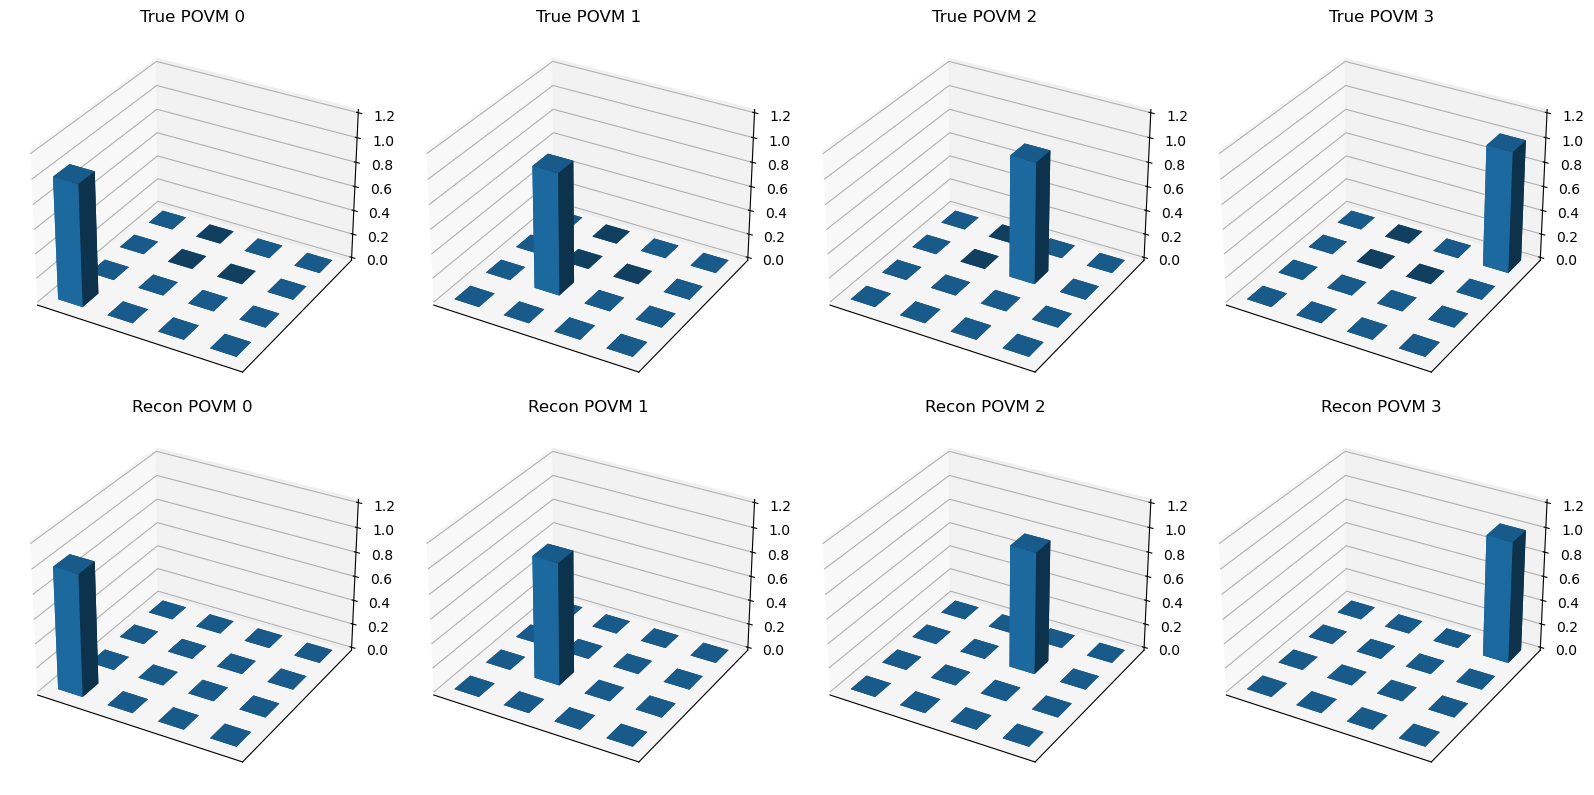

Frobenius norm : 0.0000021906 ± 0.00019425193
Wasserstein    : 0.0002889836 ± 0.00000083722


In [3]:
# Run main SGD-QMT function based on HONEST parameterization with MSE loss
recon_povms, final_probs, losses, times, recon_povms_step, total_time = Run_HonestQMT_StatePovmBatched(dimension, num_povms, rank=dimension, state_batch_size=12, povm_batch_size=num_povms,
                                                                                                        learning_rate=1e-2, n_steps=300, stop=1e-10,
                                                                                     probe_states=probe_states, target_probs=target_probs, LossPlot=True, seed=None, loss_type="mse")

# Graphically compare how well POVMs are constructed
compare_povms_3d(true_povms, recon_povms, num_povms)

# Evaluate quality of reconstructed POVMs
frob_mean, wasserstein_mean, frob_std, wasserstein_std = evaluate_metrics(recon_povms, true_povms, probe_states, target_probs)

print(f"Frobenius norm : {frob_mean:.10f} ± {frob_std:.11f}")
print(f"Wasserstein    : {wasserstein_mean:.10f} ± {wasserstein_std:.11f}")


## Method 2:  HONEST-MLE
Here we implement SGD-QMT using HONEST parametrization with MLE as a loss function. 

Seed value: 3924213568
Training system with 4 POVMs using 'mle' loss


Step 299, Loss: 1.58846e-01: 100%|██████████| 300/300 [00:00<00:00, 430.18it/s]


Total training time: 0.70 seconds


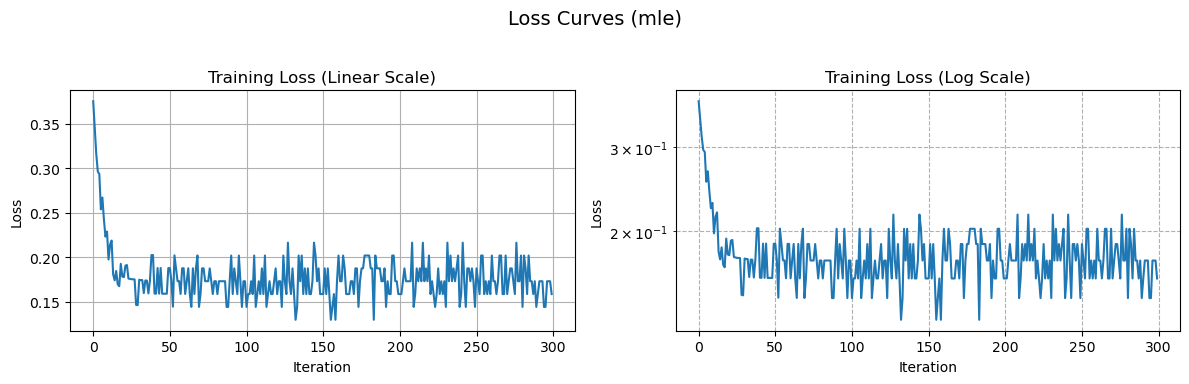

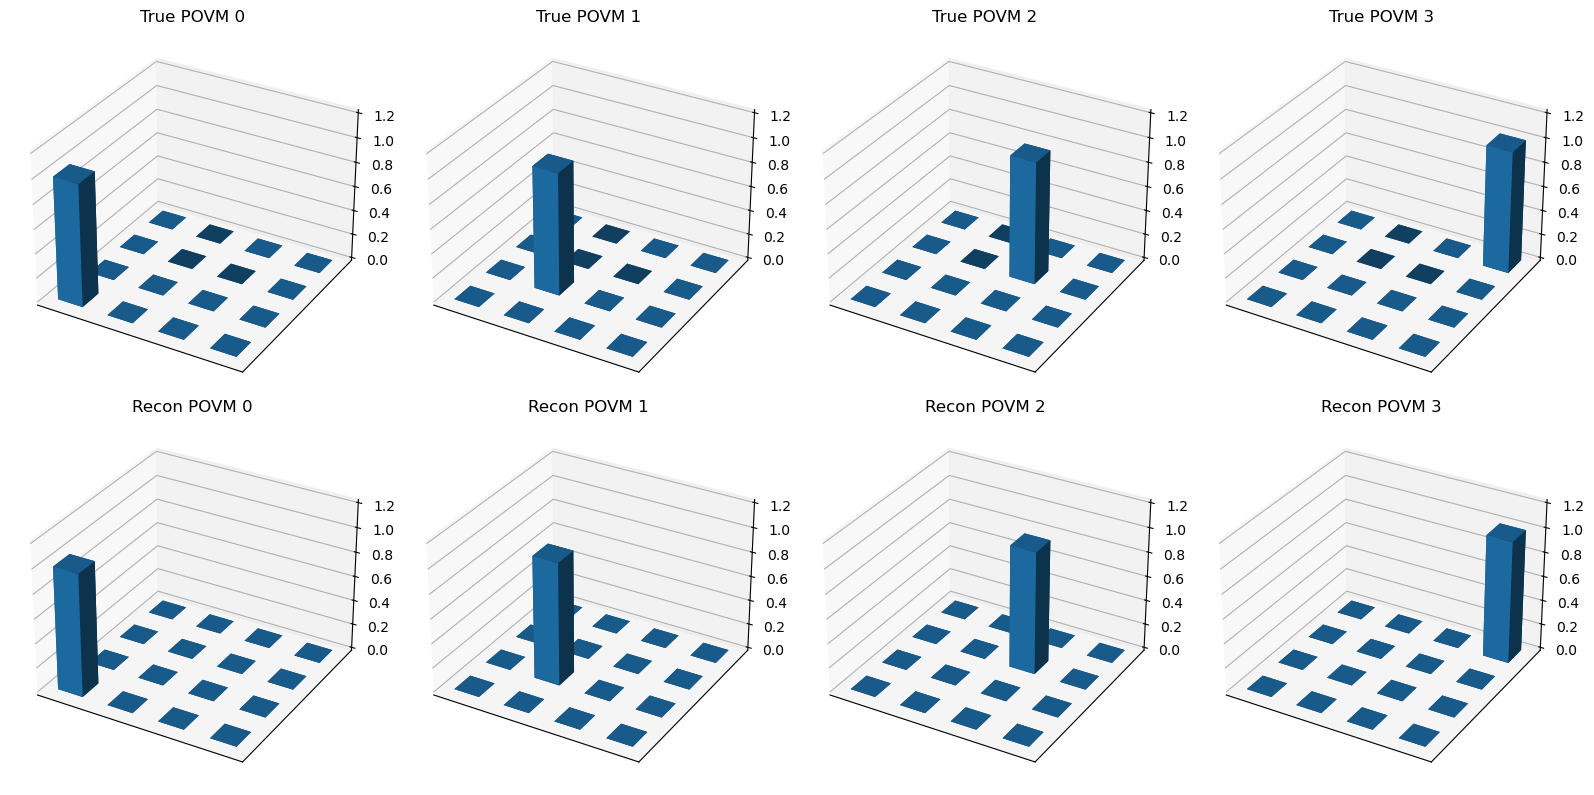

Frobenius norm : 0.0000000480 ± 0.00000000000
Wasserstein    : 0.0000000000 ± 0.00000008445


In [4]:

# Run main SGD-QMT function based on HONEST parameterization with MLE loss
recon_povms, final_probs, losses, times, recon_povms_step, total_time = Run_HonestQMT_StatePovmBatched(dimension, num_povms, rank=dimension, state_batch_size=12, povm_batch_size=num_povms,
                                                                                                        learning_rate=1e-2, n_steps=300, stop=1e-10,
                                                                                     probe_states=probe_states, target_probs=target_probs, LossPlot=True, seed=None, loss_type="mle")

# Graphically compare how well POVMs are constructed
compare_povms_3d(true_povms, recon_povms, num_povms)

# Evaluate quality of reconstructed POVMs
frob_mean, wasserstein_mean, frob_std, wasserstein_std = evaluate_metrics(recon_povms, true_povms, probe_states, target_probs)

print(f"Frobenius norm : {frob_mean:.10f} ± {frob_std:.11f}")
print(f"Wasserstein    : {wasserstein_mean:.10f} ± {wasserstein_std:.11f}")

## Method 3:  SM-MSE
Here we implement SGD-QMT using Stiefel Manifold (SM) parametrization with MSE as a loss function. 

Seed value for initial guess for Run_StiefelManiQMT_StatePovmBatched: 694694272
Training system with 4 POVMs


Training:   0%|          | 0/300 [00:00<?, ?it/s]/Users/akshayga/anaconda3/lib/python3.11/site-packages/jax/_src/lax/lax.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  x_bar = _convert_element_type(x_bar, x.aval.dtype, x.aval.weak_type)
Step 299, Loss: 2.70523e-05: 100%|██████████| 300/300 [00:00<00:00, 585.50it/s]


Total training time for Run_StiefelManiQMT_StatePovmBatched: 0.51 seconds


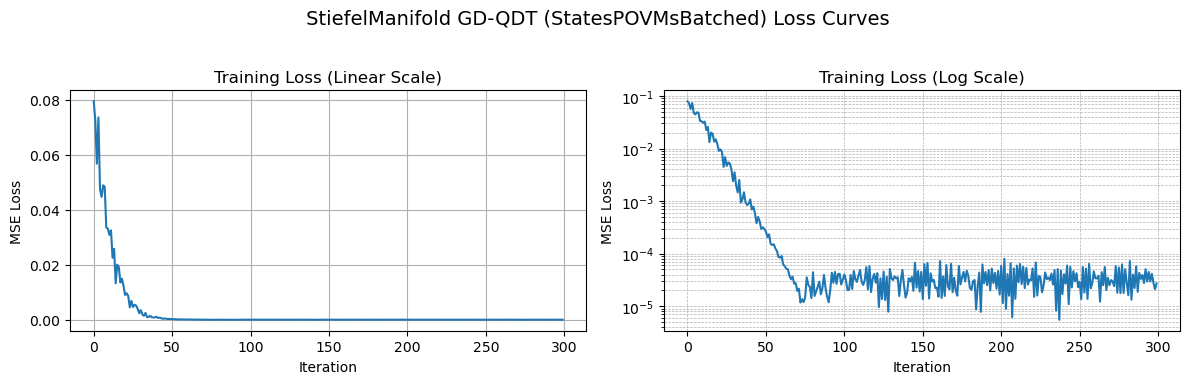

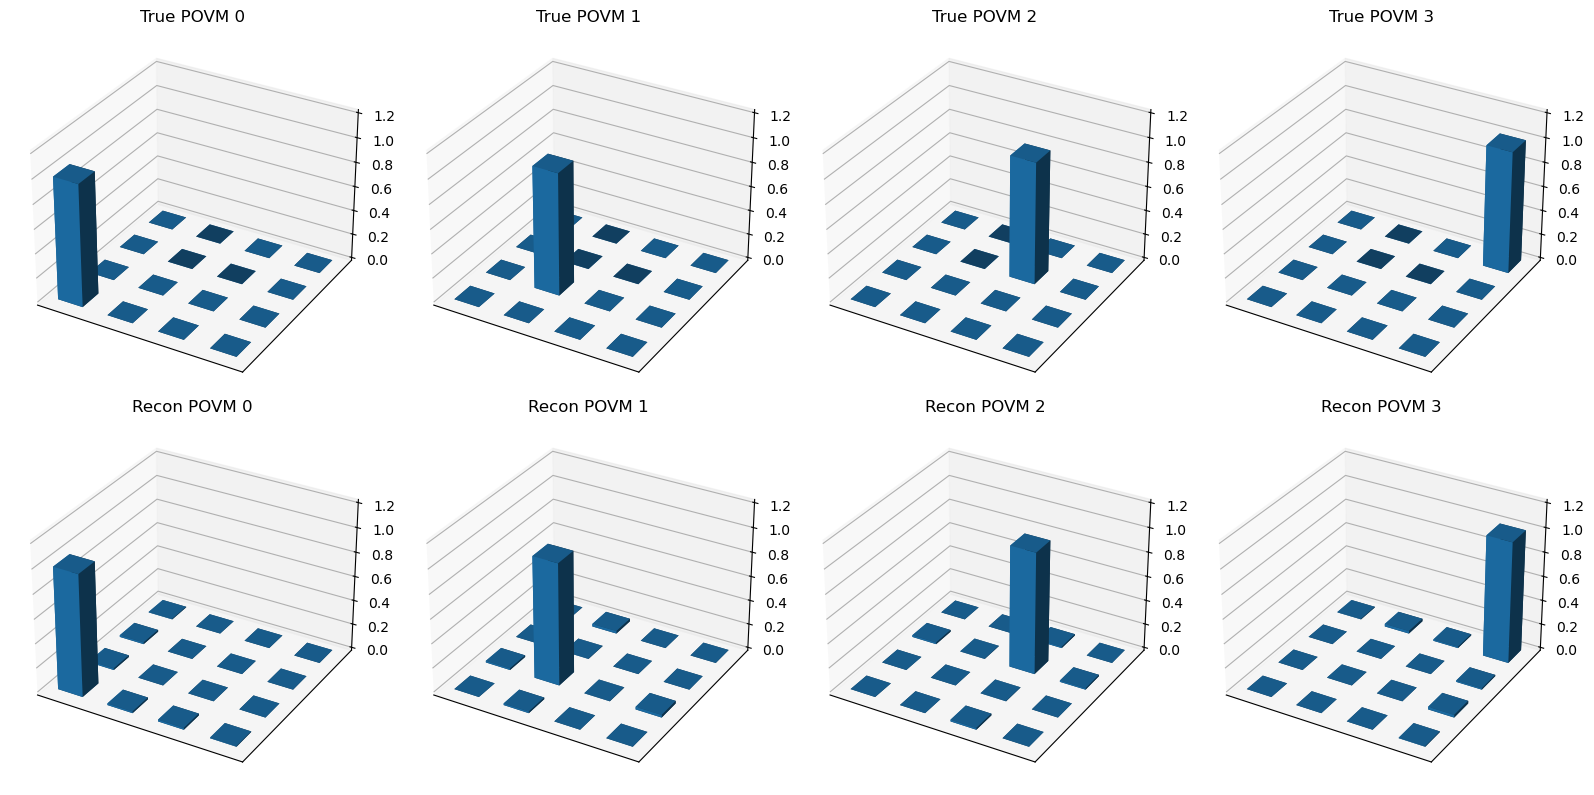

Frobenius norm : 0.0010134135 ± 0.00026475469
Wasserstein    : 0.0038099410 ± 0.00383053315


In [5]:
# Run main SGD-QMT function based on SM parameterization with MSE loss
recon_povms, final_probs, losses, times, recon_povms_step, total_time = Run_StiefelManiQMT_StatePovmBatched(dimension, num_povms, rank=dimension, state_batch_size=12, 
                                                                                                            povm_batch_size=num_povms, learning_rate=5e-2, decay=0.99, 
                                                                                            n_steps=300, stop=1e-10, probe_states=probe_states, target_probs=target_probs, 
                                                                                            LossPlot=True, seed=None, loss_type="mse")

# Graphically compare how well POVMs are constructed
compare_povms_3d(true_povms, recon_povms, num_povms)

# Evaluate quality of reconstructed POVMs
frob_mean, wasserstein_mean, frob_std, wasserstein_std = evaluate_metrics(recon_povms, true_povms, probe_states, target_probs)

print(f"Frobenius norm : {frob_mean:.10f} ± {frob_std:.11f}")
print(f"Wasserstein    : {wasserstein_mean:.10f} ± {wasserstein_std:.11f}")

## Method 4: SM-MLE
Here we implement SGD-QMT using Stiefel Manifold (SM) parametrization with MLE as a loss function. 

Seed value for initial guess for Run_StiefelManiQMT_StatePovmBatched: 1728782272
Training system with 4 POVMs


Training:   0%|          | 0/300 [00:00<?, ?it/s]/Users/akshayga/anaconda3/lib/python3.11/site-packages/jax/_src/lax/lax.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  x_bar = _convert_element_type(x_bar, x.aval.dtype, x.aval.weak_type)
Step 299, Loss: 1.59119e-01: 100%|██████████| 300/300 [00:00<00:00, 605.93it/s]


Total training time for Run_StiefelManiQMT_StatePovmBatched: 0.50 seconds


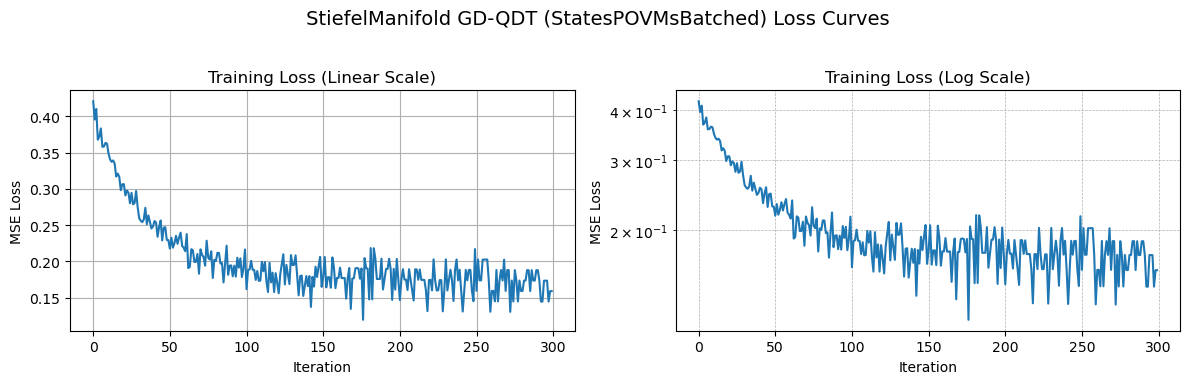

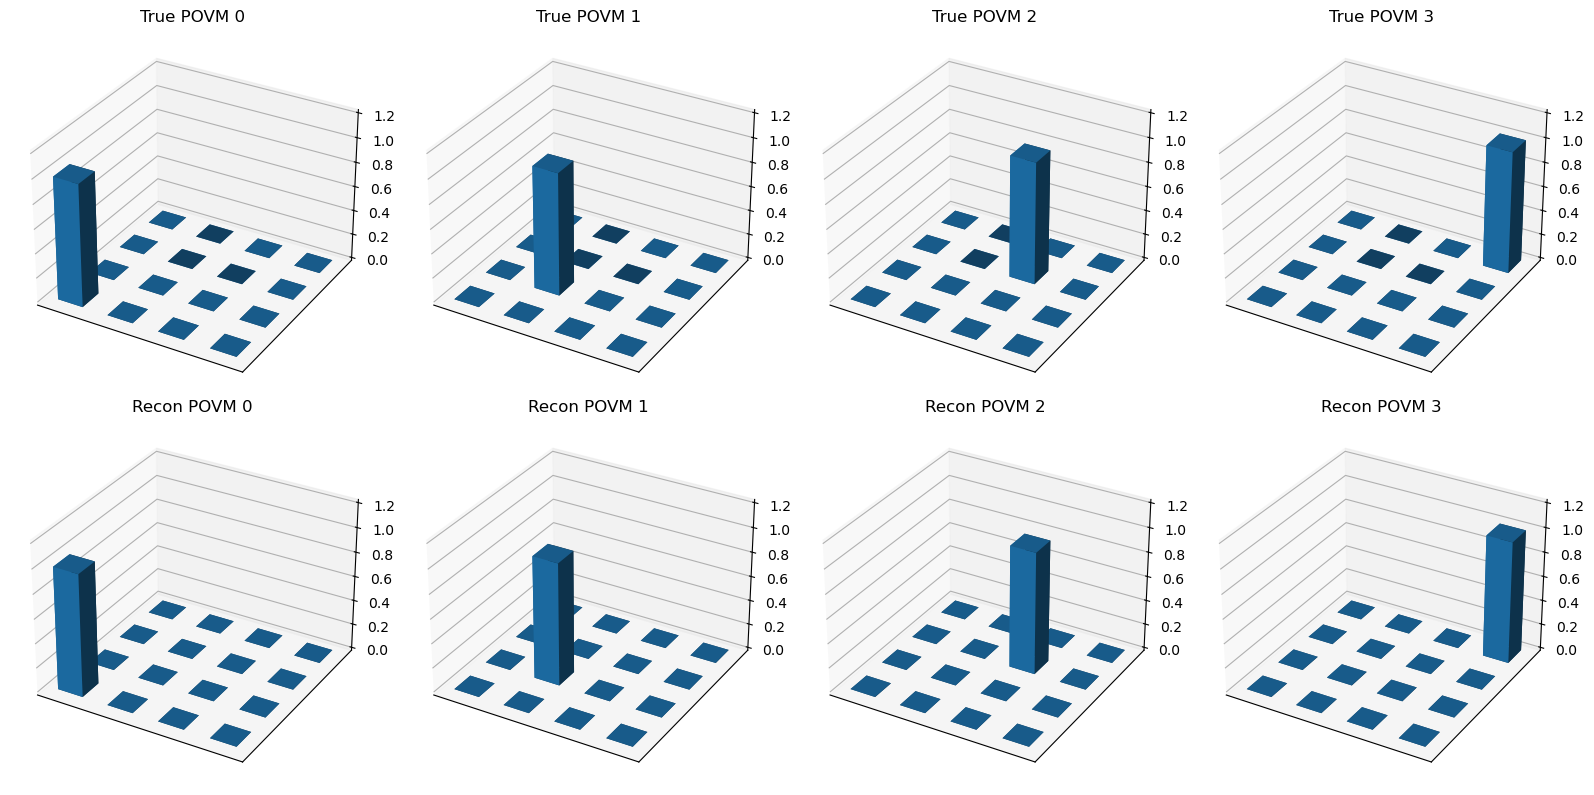

Frobenius norm : 0.0000102904 ± 0.00040642965
Wasserstein    : 0.0004915915 ± 0.00000295527


In [6]:
# Run main SGD-QMT function based on SM parameterization with MLE loss
recon_povms, final_probs, losses, times, recon_povms_step, total_time = Run_StiefelManiQMT_StatePovmBatched(dimension, num_povms, rank=dimension, state_batch_size=12, 
                                                                                                            povm_batch_size=num_povms, learning_rate=5e-2, decay=0.99, 
                                                                                            n_steps=300, stop=1e-10, probe_states=probe_states, target_probs=target_probs, 
                                                                                            LossPlot=True, seed=None, loss_type="mle")

# Graphically compare how well POVMs are constructed
compare_povms_3d(true_povms, recon_povms, num_povms)

# Evaluate quality of reconstructed POVMs
frob_mean, wasserstein_mean, frob_std, wasserstein_std = evaluate_metrics(recon_povms, true_povms, probe_states, target_probs)

print(f"Frobenius norm : {frob_mean:.10f} ± {frob_std:.11f}")
print(f"Wasserstein    : {wasserstein_mean:.10f} ± {wasserstein_std:.11f}")